
<p align ="left"><font size="5">Implement Image Classification using Extracted Relevant Features</font></p>

In [ ]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow
import glob

In [ ]:
def image_classification(model_weights, model_architecture, image):
    blob = cv2.dnn.blobFromImage(image, 0.017, (224, 224), (103.94,116.78,123.68))
    global model, classes
    rows = open('/content/drive/MyDrive/Colab Notebooks/CV_IMAGES/synset_words.txt').read().strip().split("\n")
    image_classes = [r[r.find(" ") + 1:].split(",")[0] for r in rows]
    model = cv2.dnn.readNetFromCaffe(model_architecture, model_weights)
    model.setInput(blob)
    output = model.forward()
    new_output = output.reshape(len(output[0][:]))
    expanded = np.exp(new_output - np.max(new_output))
    prob =  expanded / expanded.sum()
    conf= np.max(prob)
    index = np.argmax(prob)
    label = image_classes[index]
    text = "Label: {}, {:.2f}%".format(label, conf*100)
    cv2.putText(image, "{}: {:.2f}% confidence".format(label, conf *100), (5, 40), cv2.FONT_HERSHEY_COMPLEX, 0.6, (0,0,255), 2)
    cv2_imshow(image)
model_architecture ='/content/drive/MyDrive/Colab Notebooks/CV_IMAGES/DenseNet_121.prototxt'
model_weights = '/content/drive/MyDrive/Colab Notebooks/CV_IMAGES/DenseNet_121.caffemodel'


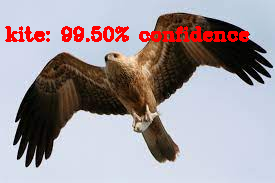

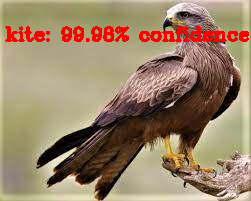

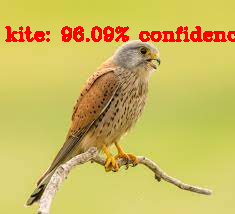

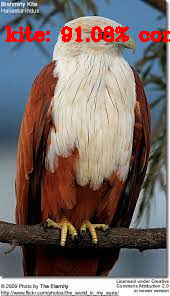

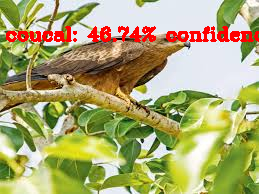

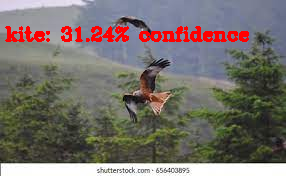

In [ ]:
for filename in glob.glob('/content/drive/MyDrive/Colab Notebooks/CV_IMAGES/Kite/*.jpg'):
  kite_img = cv2.imread(filename)
  classify_kite = image_classification(model_weights, model_architecture, kite_img)


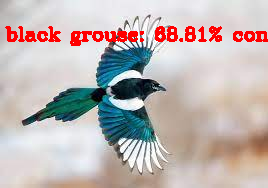

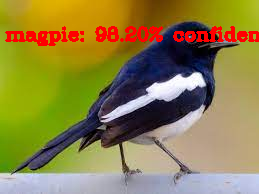

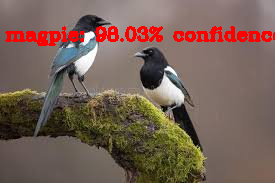

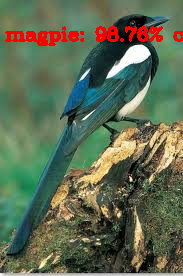

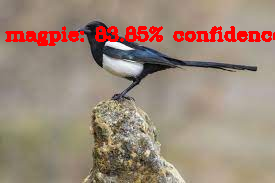

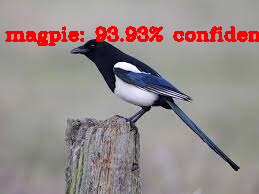

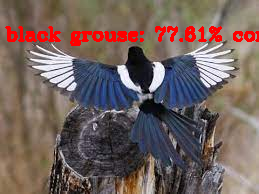

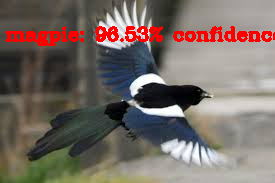

In [ ]:
for filename in glob.glob('/content/drive/MyDrive/Colab Notebooks/CV_IMAGES/Magpie/*.jpg'):
  magpie_img = cv2.imread(filename)
  classify_magpie = image_classification(model_weights, model_architecture, magpie_img)


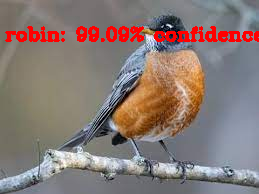

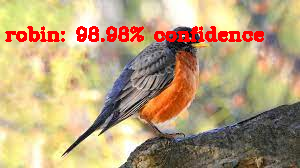

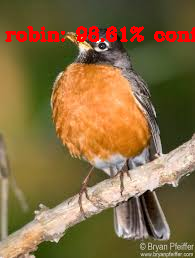

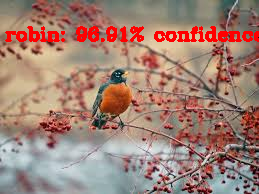

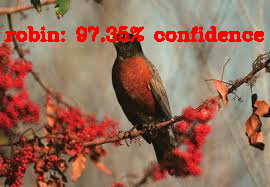

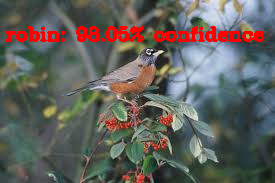

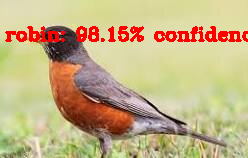

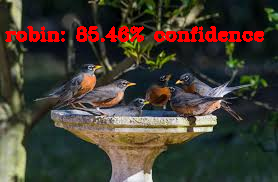

In [ ]:
for filename in glob.glob('/content/drive/MyDrive/Colab Notebooks/CV_IMAGES/American Robin/*.jpg'):
  ar_img = cv2.imread(filename)
  classify_arobin = image_classification(model_weights, model_architecture, ar_img)
